# Circuit simulation

You can describe a component linear response with its [Scattering parameters](https://en.wikipedia.org/wiki/Scattering_parameters)

The Scattering matrix of a component can be simulated with electromagnetic methods such as Finite difference time domain (FDTD)

[Simphony](https://simphonyphotonics.readthedocs.io/en/latest/) open source package provides you with some of the the circuit linear solver to solve the circuit response of several components connected in a circuit. Simphony also has some of the UBC models built-in.

For some components not available in simphony you can leverage gdsfactory FDTD lumerical interface to compute the Sparameters of a component.


## Component models

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import gdsfactory as gf
import gdsfactory.simulation.simphony as gs
import ubcpdk
import ubcpdk.simulation.circuits_simphony as cm

2022-06-22 20:37:57.026 | INFO     | gdsfactory.config:<module>:52 - Load '/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/gdsfactory' 5.10.15


2022-06-22 20:37:58.966074: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-22 20:37:58.966114: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2022-06-22 20:38:01.193144: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-22 20:38:01.193179: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-22 20:38:01.193220: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fv-az196-685): /proc/driver/nvidia/version does not exist
2022-06-22 20:38:01.193565: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


INFO:tensorflow:Restoring parameters from /usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/SiPANN/ANN/TIGHT_ANGLE_GAP/model


2022-06-22 20:38:01.432256: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled


INFO:tensorflow:Restoring parameters from /usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/SiPANN/ANN/TIGHT_ANGLE_STRAIGHT/model


INFO:tensorflow:Restoring parameters from /usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/SiPANN/ANN/TIGHT_ANGLE_BENT_RAND/model


2022-06-22 20:38:02.469 | INFO     | ubcpdk:<module>:36 - Found UBCpdk '1.6.4' installed at PosixPath('/home/runner/work/ubc/ubc/ubcpdk')


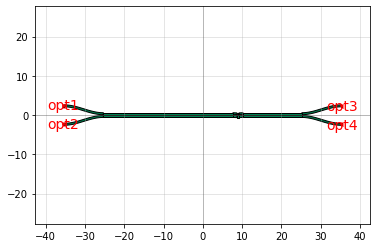

ebeam_bdc_te1550: uid 0, ports ['opt2', 'opt1', 'opt3', 'opt4'], aliases [], 19 polygons, 0 references

In [2]:
ubcpdk.components.dc_broadband_te()

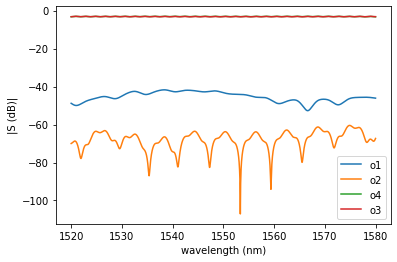

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S (dB)|'>

In [3]:
c = cm.ebeam_bdc_te1550()
gs.plot_model(c)

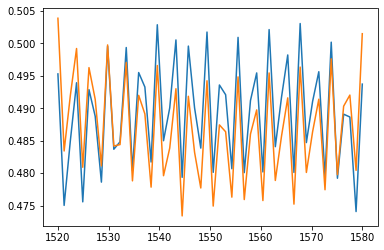

In [4]:
bdc = cm.ebeam_bdc_te1550()
w = np.linspace(1520, 1580) * 1e-9
f = 3e8 / w
s = bdc.s_parameters(freqs=f)
plt.plot(w * 1e9, np.abs(s[:, 0, 2]) ** 2)
plt.plot(w * 1e9, np.abs(s[:, 0, 3]) ** 2)

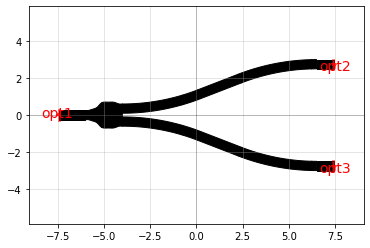

ebeam_y_1550: uid 1, ports ['opt1', 'opt2', 'opt3'], aliases [], 18 polygons, 0 references

In [5]:
ubcpdk.components.y_splitter()

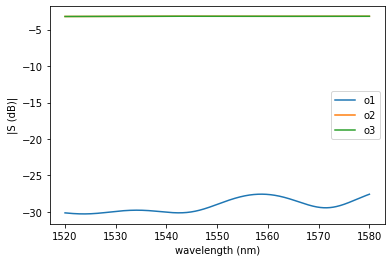

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S (dB)|'>

In [6]:
c = cm.ebeam_y_1550()
gs.plot_model(c)

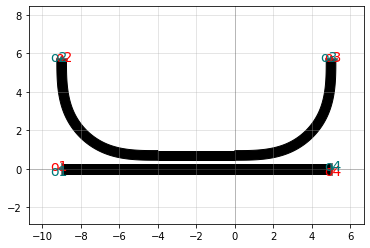

ebeam_dc_halfring_straight: uid 12, ports ['o2', 'o1', 'o3', 'o4'], aliases [], 1 polygons, 1 references

In [7]:
ubcpdk.components.ebeam_dc_halfring_straight()

/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/simphony/libraries/siepic/__init__.py:438: UserWarning: Exact parameters not available for '<class 'simphony.libraries.siepic.HalfRing'>', using closest approximation (results may not be as accurate).
Requested: {'gap': 3e-08, 'radius': 1e-05, 'width': 5e-07, 'thickness': 2.2e-07, 'couple_length': 0.0}
Selected:  {'gap': 1e-07, 'radius': 1e-05, 'width': 5e-07, 'thickness': 2.2e-07, 'couple_length': 0.0}
NOTE: Model attributes may have been automatically modified.
  warnings.warn(msg, UserWarning)


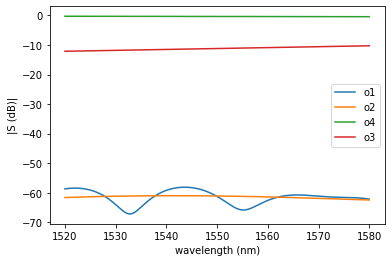

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S (dB)|'>

In [8]:
c = cm.ebeam_dc_halfring_straight()
gs.plot_model(c)

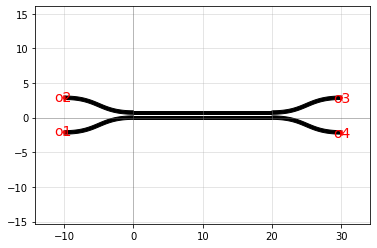

coupler_copy: uid 21, ports ['o1', 'o2', 'o3', 'o4'], aliases [], 7 polygons, 0 references

In [9]:
ubcpdk.components.ebeam_dc_te1550()

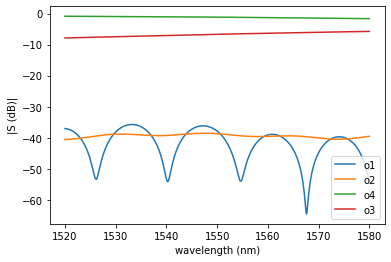

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S (dB)|'>

In [10]:
c = cm.ebeam_dc_te1550()
gs.plot_model(c)

## Circuit simulations

We can also do some circuit simulations.

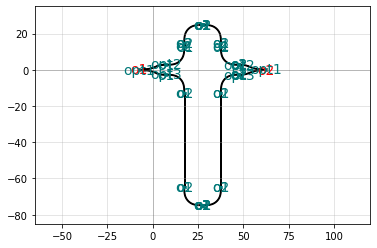

mzi_ecdcd2bf: uid 24, ports ['o1', 'o2'], aliases [], 0 polygons, 20 references

In [11]:
ubcpdk.components.mzi(delta_length=100)

2022-06-22 20:38:06.093 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys([])


2022-06-22 20:38:06.095 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys([])


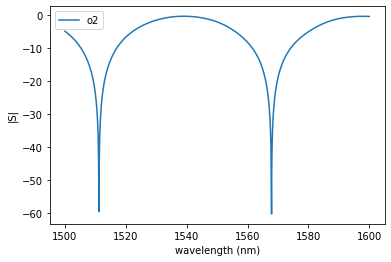

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S|'>

In [12]:
circuit_mzi =cm.mzi(delta_length=10)
gs.plot_circuit(circuit_mzi)

2022-06-22 20:38:21.949 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys([])


2022-06-22 20:38:21.951 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys([])


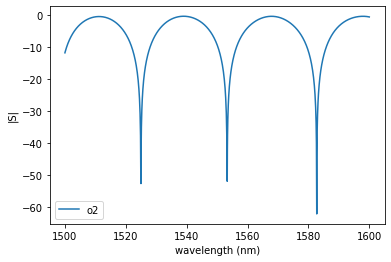

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S|'>

In [13]:
# double delta_length creates half FSR
circuit_mzi = cm.mzi(delta_length=20)
gs.plot_circuit(circuit_mzi)